## ROI-based FC Analysis
### Running a 2x2 ANOVA on the 6 ROI clusters that were significantly connected to both left and right MTs during the non-stimulated condition

####Taku Ito
####10/3/15

##General Procedure

####Prior to the code/analysis listed below...
The analyses below were performed using AFNI commands
1. Run whole brain FC t-test, searching for significant connections with left MT against baseline and right MT against baseline, during the no-stimulation condition
2. Find the intersection of these two significant whole-brain maps. (Both maps were corrected for multiple comparisons)
3. Extract average timeseries for each of these 6 clusters in each of the conditions, i.e., stimulation versus no-stimulation for all subjects

N.B. There were 6 distinct clusters that were found. The largest cluster, however, was a massive cluster of ~12000 voxels. It's most likely not informative, and basically is the entire visual cortex as it makes sense for both MTs to be functionally connected to it. I've included it anyway.

Analysis done in python (I would have used Matlab had I known python did not have a good ANOVA implementation)
1. For every subject, run a correlation with the left MT seed and each of the 6 clusters for each of the 2 conditions (stimulation versus no stimulation). This results in 4 correlation values for every cluster in every subject.
2. Organized and output into a matrix output for every cluster to run the ANOVA in Matlab.

Analysis done in MATLAB... see below...

Also, the images below are generated in AFNI. the pinpoints are based on center of mass, which is why for the first cluster the pins do not point to any actual part of the clusters.

In [1]:
%%
basedir = '/projects/Collaborations/KrekelbergCollaboration/MotionAdaptation_tACS_FC/';
resultsdir = [basedir 'data/results/'];
numClust = 6;
numSubjs = 10;

In [1]:
% Run a 2 x 2 ANOVA on the correlations for stim v no_stim X left v right
% Originally was going to do it in python, but then realized there was no good ANOVA implementation so
% importing ANOVA matrix set up from python output

% rows: 10 subjects x 2 a-levels = 20
% columns: 2 b-levels; left MT connectivity in column 1, right MT connectivity in column 2
% 3rd dim: number of clusters
anovaMat = zeros(20,2,numClust);
anovaResults = zeros(numClust,3);

% Variables for group statistics and plots
lMT_mean = zeros(numClust,2);
rMT_mean = zeros(numClust,2);
lMT_error = zeros(numClust,2);
rMT_error = zeros(numClust,2);

for clust=1:numClust
    anovaMat(:,:,clust) = csvread([resultsdir 'ROI_Based_Analysis_Intersection/cluster' num2str(clust) '_ANOVA_mat.csv']);
    anovaResults(clust,:) = anova2(anovaMat(:,:,clust),numSubjs); % num reps = num subjs
    
    % Compute group means
    lMT_mean(clust,1) = mean(anovaMat(1:10,1,clust)); % nostim left
    rMT_mean(clust,1) = mean(anovaMat(1:10,2,clust)); % nostim right
    lMT_mean(clust,2) = mean(anovaMat(11:20,1,clust)); % stim left
    rMT_mean(clust,2) = mean(anovaMat(11:20,2,clust)); % stim right
    % Compute group standard errors
    lMT_error(clust,1) = std(anovaMat(1:10,1,clust))/sqrt(numSubjs); % nostim left
    rMT_error(clust,1) = std(anovaMat(1:10,2,clust))/sqrt(numSubjs); % nostim right
    lMT_error(clust,2) = std(anovaMat(11:20,1,clust))/sqrt(numSubjs); % stim left
    rMT_error(clust,2) = std(anovaMat(11:20,2,clust))/sqrt(numSubjs); % stim right
    
    x = 0:1;
end


Images must contain fewer than 2^32 - 1 bytes of data.

## Compute Plots of Mean Correlations

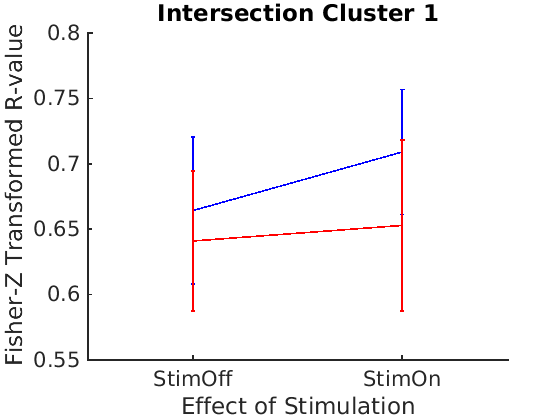

ANOVA Results
Main Effect of L/R: p = 0.48369
Main Effect of Stimulation: p = 0.61636
Interaction Effect: p = 0.77112

In [5]:
% First Cluster 1
clust = 1;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

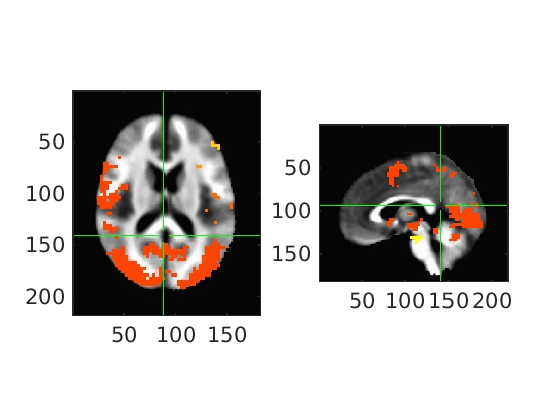

In [22]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust1_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust1_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])

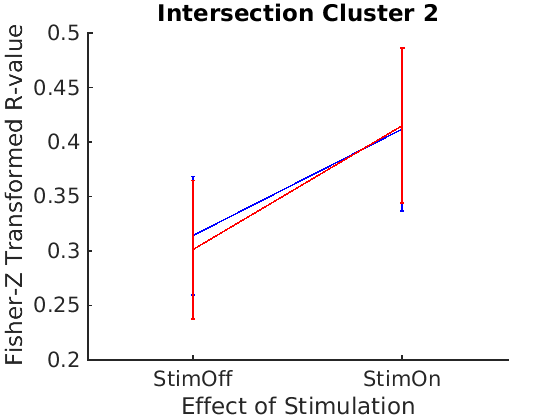

ANOVA Results
Main Effect of L/R: p = 0.94208
Main Effect of Stimulation: p = 0.12045
Interaction Effect: p = 0.90475

In [6]:
% Cluster 2
clust = 2;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

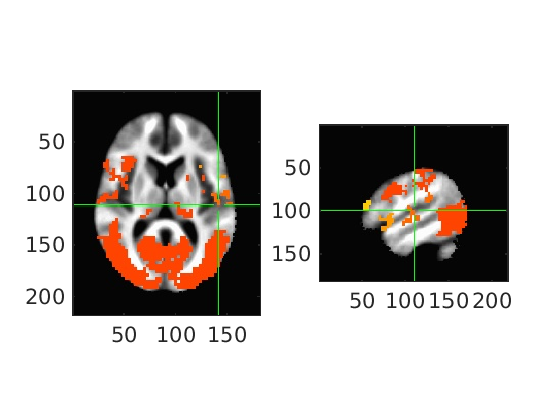

In [23]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust2_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust2_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])

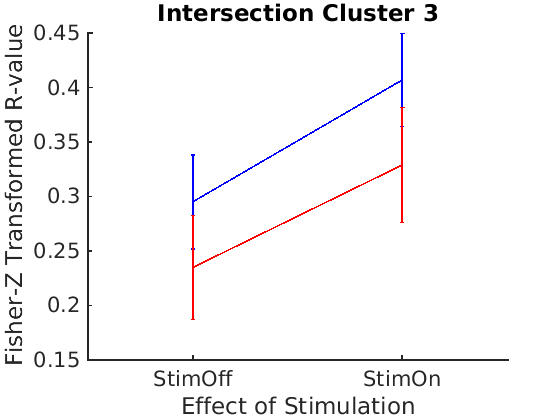

ANOVA Results
Main Effect of L/R: p = 0.14779
Main Effect of Stimulation: p = 0.034169
Interaction Effect: p = 0.85018

In [7]:
% Cluster 3
clust = 3;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

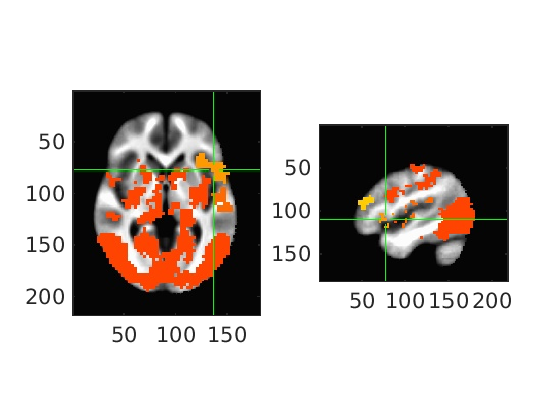

In [24]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust3_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust3_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])

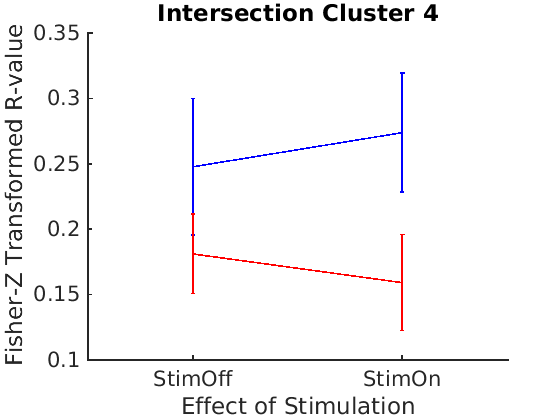

ANOVA Results
Main Effect of L/R: p = 0.037637
Main Effect of Stimulation: p = 0.96063
Interaction Effect: p = 0.57077

In [8]:
% Cluster 4
clust = 4;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

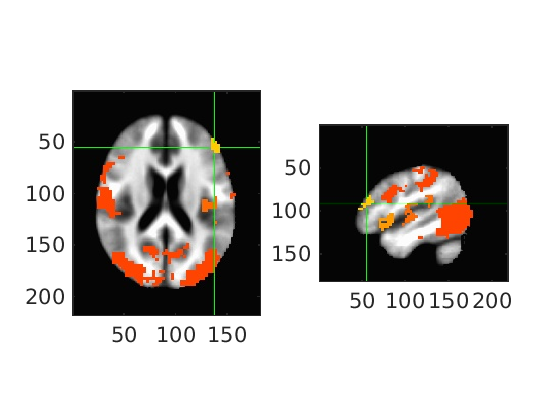

In [25]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust4_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust4_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])

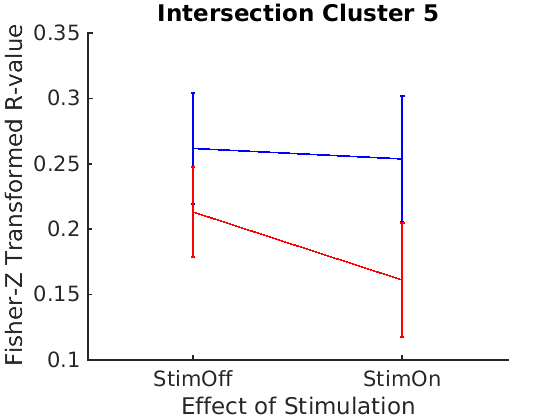

ANOVA Results
Main Effect of L/R: p = 0.10409
Main Effect of Stimulation: p = 0.48199
Interaction Effect: p = 0.60606

In [10]:
% Cluster 5
clust = 5;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

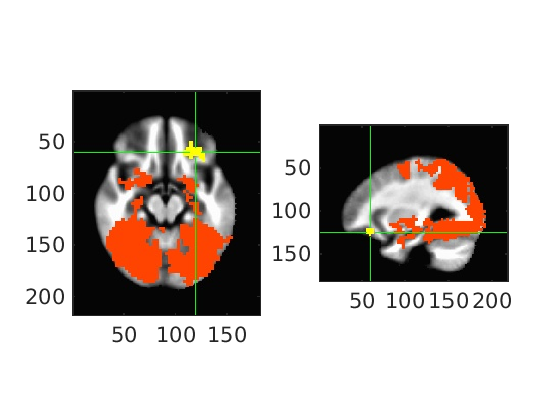

In [26]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust5_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust5_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])

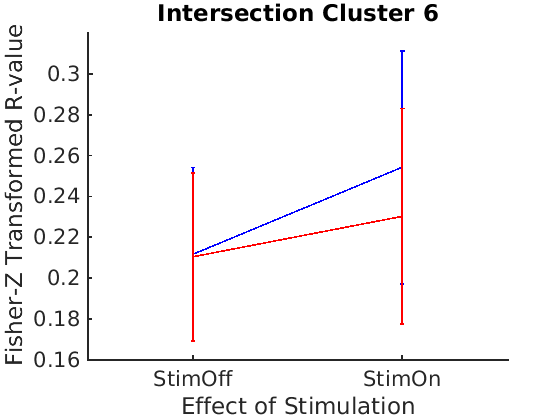

ANOVA Results
Main Effect of L/R: p = 0.79729
Main Effect of Stimulation: p = 0.52628
Interaction Effect: p = 0.81645

In [11]:
% Cluster 6
clust = 6;
disp(['ANOVA Results'])
disp(['Main Effect of L/R: p = ' num2str(anovaResults(clust,1))])
disp(['Main Effect of Stimulation: p = ' num2str(anovaResults(clust,2))])
disp(['Interaction Effect: p = ' num2str(anovaResults(clust,3))])
figure
hold on
errorbar(x,lMT_mean(clust,:), lMT_error(clust,:),'b')
errorbar(x,rMT_mean(clust,:), rMT_error(clust,:),'r')
ylabel('Fisher-Z Transformed R-value')
xlabel('Effect of Stimulation')
set(gca, 'XTickLabel', {'StimOff', 'StimOn'}, 'XTick', [0,1])
title(['Intersection Cluster ' num2str(clust)])

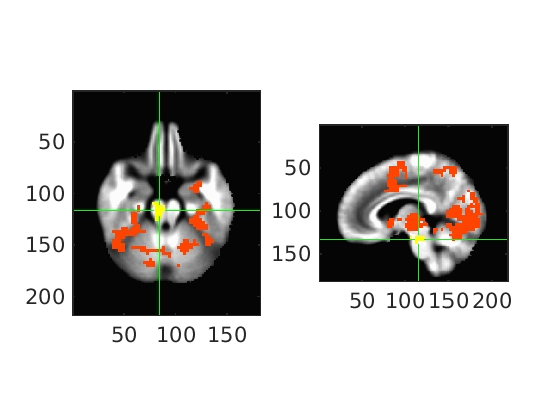

In [27]:
dir = [resultsdir 'ROI_Based_Analysis_Intersection/'];
%figure
figure
subplot(1,2,1)
ax = imread([dir 'clust6_axial.jpg']);
imagesc(ax)
set(gca,'DataAspectRatio',[1 1 1])
subplot(1,2,2)
sag = imread([dir 'clust6_sag.jpg']);
%figure
imagesc(sag)
set(gca,'DataAspectRatio',[1 1 1])